In [153]:
import math
import numpy as np
import matplotlib.pyplot as plt
import graphviz
%matplotlib inline

In [154]:
def f(x):
    return 5*x**3 - 3*x**2 -4*x + 5

In [155]:
f(5)


535

In [156]:
xs = np.linspace(2.5,3.5,40);xs

array([2.5       , 2.52564103, 2.55128205, 2.57692308, 2.6025641 ,
       2.62820513, 2.65384615, 2.67948718, 2.70512821, 2.73076923,
       2.75641026, 2.78205128, 2.80769231, 2.83333333, 2.85897436,
       2.88461538, 2.91025641, 2.93589744, 2.96153846, 2.98717949,
       3.01282051, 3.03846154, 3.06410256, 3.08974359, 3.11538462,
       3.14102564, 3.16666667, 3.19230769, 3.21794872, 3.24358974,
       3.26923077, 3.29487179, 3.32051282, 3.34615385, 3.37179487,
       3.3974359 , 3.42307692, 3.44871795, 3.47435897, 3.5       ])

In [157]:
ys = f(xs)
ys

array([ 54.375     ,  56.3144334 ,  58.29973744,  60.33141784,
        62.40998036,  64.53593073,  66.70977469,  68.93201799,
        71.20316635,  73.52372553,  75.89420127,  78.31509929,
        80.78692535,  83.31018519,  85.88538453,  88.51302913,
        91.19362472,  93.92767705,  96.71569185,  99.55817487,
       102.45563184, 105.4085685 , 108.4174906 , 111.48290388,
       114.60531406, 117.78522691, 121.02314815, 124.31958352,
       127.67503877, 131.09001964, 134.56503186, 138.10058118,
       141.69717333, 145.35531406, 149.07550911, 152.85826422,
       156.70408512, 160.61347755, 164.58694727, 168.625     ])

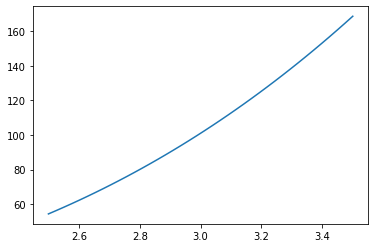

In [158]:
plt.plot(xs,ys)

In [159]:
h = 0.01

In [160]:
def f_derivative(a,h):
    return (f(a+h)-f(a))/h


In [161]:
a = f_derivative(3,0.1);b = f_derivative(3,0.2);c = f_derivative(3,0.3);d = f_derivative(3,0.4)

In [162]:
a1 = f(3) + (xs-3)*a
b1 = f(3) + (xs-3)*b
c1 = f(3) + (xs-3)*c
d1 = f(3) + (xs-3)*d;    a1

array([ 42.375     ,  45.38141026,  48.38782051,  51.39423077,
        54.40064103,  57.40705128,  60.41346154,  63.41987179,
        66.42628205,  69.43269231,  72.43910256,  75.44551282,
        78.45192308,  81.45833333,  84.46474359,  87.47115385,
        90.4775641 ,  93.48397436,  96.49038462,  99.49679487,
       102.50320513, 105.50961538, 108.51602564, 111.5224359 ,
       114.52884615, 117.53525641, 120.54166667, 123.54807692,
       126.55448718, 129.56089744, 132.56730769, 135.57371795,
       138.58012821, 141.58653846, 144.59294872, 147.59935897,
       150.60576923, 153.61217949, 156.61858974, 159.625     ])

In [163]:
#xs = np.array([0.00005,0.00004,0.00003,0.00002,0.00001])

In [164]:
#ys= f_derivative(a,xs)
#ys

In [165]:
#plt.plot(xs,ys)

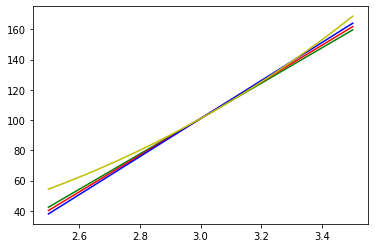

In [166]:
plt.plot(xs,a1,'g')
plt.plot(xs,b1,'r')
plt.plot(xs,c1,'b')
plt.plot(xs,ys,'y')


In [167]:
a = 3
b = -2
c = 12
d = a*b + c

h = 0.0001

a+=h
d1 = a*b + c
a-= h
print ( f"d is {d} \nd1 is {d1} \nslope is {((d1-d)/h)}\n")

b+=h
d1 = a*b + c
b-= h
print ( f"d is {d} \nd1 is {d1} \nslope is {((d1-d)/h)}\n")

c+=h
d1 = a*b + c
c-= h
print ( f"d is {d} \nd1 is {d1} \nslope is {((d1-d)/h)}")


d is 6 
d1 is 5.9998 
slope is -2.0000000000042206

d is 6 
d1 is 6.0003 
slope is 3.00000000000189

d is 6 
d1 is 6.0001 
slope is 0.9999999999976694


In [168]:
#now creating the class value , in order to have the same arithmetic functions but have pointers to the objects and store extra info such aschildren and operands for back-propapgation

class Value:
    def __init__(self,data, _children=(),_op='', label=''):
        self.data = data
        self.children = set(_children)
        self.op = _op
        self.label = label
        self.grad = 0.0

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self,other):
        return Value(self.data+other.data , (self,other), '+')

    def __mul__(self,other):
        return Value(self.data*other.data , (self,other) ,'*')

    def __sub__(self,other):
        return Value(self.data-other.data , (self,other) ,'-')

    def __truediv__(self,other):
        return Value(self.data/other.data , (self,other) ,'/')


    

In [169]:
a = Value(3,label = 'a')
b = Value(-2, label = 'b')
c = Value(12 , label = 'c')

d = a/b - c 
d.label='d'



In [170]:
d

Value(data=-13.5)

In [171]:
3 * -3.2 + 6


-3.6000000000000014

In [172]:
# yeah floats are weird

In [173]:
#copypasta

from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

In [174]:
draw_dot(d)

AttributeError: 'Value' object has no attribute '_prev'